# Démonstration Web Scraping - Welcome To The Jungle 
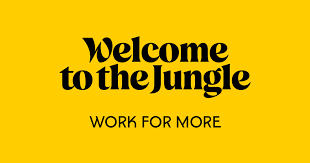


In [7]:
from bs4 import BeautifulSoup as bs
import requests 
import pandas as pd

wttj_url = 'https://www.welcometothejungle.com/fr/companies/datascientest/jobs/data-engineer-h-f-cdi_puteaux_DATAS_ZMLPerq'
page = requests.get(wttj_url)
soup = bs(page.text, "lxml")


## Collecte des données d'une offre

In [8]:
def get_info(link):
    page = requests.get(link)
    soup = bs(page.text, "lxml")

    company = soup.find('span', attrs = {'class' : "sc-dxcDKg hwAIog wui-text"}).text
    title = soup.find('h1', attrs = {'color': "white"}).text
    lieu = soup.find('span', attrs = {'class': "k2ldby-3 kuSacT"}).span.text
    contrat = soup.find('div', attrs = { 'role':"listitem"}).text
    try : 
        if soup.find("time").has_attr('datetime'):
            debut= soup.find("time").text
    except : 
        debut = "Non trouvé"

    spans = soup.find_all('span', attrs = {'class': "sc-bXCLTC kJcLKT"})
    education = spans[1].find_next("span").find_next("span").string 
    try :
        experience = spans[2].find_next("span").find_next("span").string 
    except : 
        experience = "non spécifié"
    
    col = soup.find("div", class_="sc-bXCLTC hBkEnu")
    #for i,each_div in enumerate(col.find_all("div")):
        #print(i, ':' ,each_div.text)
    taille = col.find_all("div")[2].text
    domaine = col.find_all("div")[3].text
    try : 
        profil = soup.find("section", id='profile-section').text
    except : 
        profil = "non spécifié"
    
    line=[company,domaine,taille,lieu,title,debut,contrat,education,experience,profil,link]
    return line

get_info('https://www.welcometothejungle.com/fr/companies/datascientest/jobs/data-engineer-h-f-cdi_puteaux_DATAS_ZMLPerq')

['Datascientest',
 'SaaS / Cloud Services, EdTech, Formation',
 'Entre 50 et 250 salariés',
 '1, Terrasse Bellini, Puteaux, 92800',
 ' Data Engineer (H/F) | CDI',
 '31 août 2023',
 'CDI\xa0',
 'Bac +5 / Master',
 '> 6 mois',
 'Profil recherchéChez Datascientest, nous valorisons la diversité des profils et sommes convaincus par la force du collectif. Cette offre d’emploi est ouverte à tous, quel que soit votre niveau d’expérience.Compétences requises :Excellente maitrise de PythonBonne maitrise de la programmation orienté objetLa maitrise de Scala (Spark) est un +Attrait pour l’actualité relative au machine learning, l’engineering et à l’open-source.Bon niveau en Anglais.La connaissance d’un provider cloud est très appréciée (AWS, Azure, GCP)ETLBonne connaissance des différents Systèmes de Gestion de Bases de DonnéesBonnes connaissances en script BashAttrait pour l’actualité relative au machine learningOutils de mise en production: Docker, Kubernetes, FastAPI, AirflowSavoir faireS’adapt

## Essayons sur une autre offre d'emploi

In [9]:
url2 = 'https://www.welcometothejungle.com/fr/companies/datascientest/jobs/data-analyst-h-f-cdi_puteaux'
get_info(url2)

['Datascientest',
 'SaaS / Cloud Services, EdTech, Formation',
 'Entre 50 et 250 salariés',
 '1, Terrasse Bellini, Puteaux, 92800',
 ' Data Analyst (H/F) | CDI',
 '3 septembre 2023',
 'CDI\xa0',
 'Bac +5 / Master',
 '> 6 mois',
 'Preferred experienceDe formation Bac+3/5 type école de commerce ou ingénieur, avec une spécialisation dans l’informatique décisionnelle, vous bénéficiez d’au moins 1 an d’expérience en tant que Data Analyst.Vous avez les compétences suivantes :Vous montrez un intérêt pour la compréhension et l’analyse de problématiques métiersVous maîtrisez les principaux outils de BI sur le marché : Power BI, Looker Studio, Tableau,..SQL n’a plus de secret pour vous·Vous êtes à l’aise à l’oral et pédagogue aussi bien en français qu’en anglaisVous maîtrisez les concepts de Data Modelling / Modélisation de données dans des entrepôts : DataLake / Datawarehouse / Datamart (Conception ERD, Modélisation Etoile, Modélisation Flocon, Table de faits, Table de dimensions, Mesures, Dime

## Généralisons à toutes les autres offres d'emploi de Datascientest

In [10]:
jobs_list = []
for i in range(1,3):
    all_jobs = "https://www.welcometothejungle.com/fr/companies/datascientest/jobs?page="+str(i)
    page = requests.get(all_jobs)
    soup = bs(page.text,'lxml')
    divs = soup.find_all('div',class_="sc-1peil1v-7 fTGJpK")
    for div in divs : 
        a = div.find("a")
        if ("/fr/companies" in a["href"]) and (a["href"] not in jobs_list):
            jobs_list.append(a["href"])
            
print(len(jobs_list))
jobs_list

60


['/fr/companies/datascientest/jobs/designer-graphique-illustration-h-f-cdi_puteaux_DATAS_2ZaOmVr?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=947840',
 '/fr/companies/datascientest/jobs/data-scientist_levallois-perret?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=367193',
 '/fr/companies/datascientest/jobs/charge-de-planification-h-f-cdi_puteaux?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=1959260',
 '/fr/companies/datascientest/jobs/data-analyst-h-f-cdi_puteaux?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=1948407',
 '/fr/companies/datascientest/jobs/business-developer-b2c-h-f-cdi_puteaux_DATAS_p3MR54R?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=1936011',
 '/fr/companies/datascientest/jobs/developpeur-junior-h-f-cdi_puteaux_DATAS_7WO6Ork?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=1931746',
 '/fr/companies/datascientest/jobs/project-manager-h-f-stage_puteaux_DATAS_4AGoL0W?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=1929906',
 '/fr/companies/datascientest/jobs/administrateur-big-data-h-f-poei_puteaux?q=d98bcc7451fac1a88bce31c7cc1e7f0c&o=19

In [12]:
base = "https://www.welcometothejungle.com"
df = pd.DataFrame(columns=["Company","Domaine","Taille","Lieu","Titre","Debut","Contrat","Education","Experience","Profil", "Link"])

for i,job in enumerate(jobs_list) : 
    row = get_info(base+job)
    a = pd.DataFrame([row],columns=["Company","Domaine","Taille","Lieu","Titre","Debut","Contrat","Education","Experience","Profil","Link"])
    #print(i,':',row)
    df = pd.concat([df,a],ignore_index=True)
    
df

,Company,Domaine,Taille,Lieu,Titre,Debut,Contrat,Education,Experience,Profil,Link
0,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Cadreur / Monteur (H/F) | Alternance,31 août 2023,Alternance (12 mois),Bac +4,> 6 mois,"Profil recherchéChez Datascientest, nous valor...",https://www.welcometothejungle.com/fr/companie...
1,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Data Scientist (H/F) | Stage,31 août 2023,Stage (6 mois),Non spécifié,Non spécifié,"Profil recherchéChez Datascientest, nous valor...",https://www.welcometothejungle.com/fr/companie...
2,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Chargé(e) d'opérations (H/F) | CDI,31 août 2023,CDI,Bac +3,> 6 mois,Profil recherchéDiplômé(e) bac+3 ou bac+5 :Tu ...,https://www.welcometothejungle.com/fr/companie...
3,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Data Analyst (H/F) | CDI,3 septembre 2023,CDI,Bac +5 / Master,> 6 mois,Preferred experienceDe formation Bac+3/5 type ...,https://www.welcometothejungle.com/fr/companie...
4,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Business Developer (H/F) | CDI,il y a 1 heure,CDI,Non spécifié,non spécifié,Profil recherchéDiplômé(e) Bac+5: Tu es autono...,https://www.welcometothejungle.com/fr/companie...
5,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Développeur Python Junior (H/F) | CDI,il y a 1 heure,CDI,Non spécifié,non spécifié,Profil recherchéTu cherches la bonne opportuni...,https://www.welcometothejungle.com/fr/companie...
6,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",International Project Manager (H/F) | Internship,30 juin 2023,Stage (6 mois),Non spécifié,< 6 mois,"Preferred experienceBusiness school, engineeri...",https://www.welcometothejungle.com/fr/companie...
7,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Administrateur Big Data (H/F) | POEI,il y a 1 heure,CDI,> 2 ans,non spécifié,Profil recherchéVous êtes diplômé(e) au minimu...,https://www.welcometothejungle.com/fr/companie...
8,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Data Manager (H/F) | POEI,il y a 16 heures,CDI,> 2 ans,non spécifié,Profil recherchéVous avez un Master 2 issu d’u...,https://www.welcometothejungle.com/fr/companie...
9,Datascientest,"SaaS / Cloud Services, EdTech, Formation",Entre 50 et 250 salariés,"1, Terrasse Bellini, Puteaux, 92800",Data Marketing Expert (H/F) | CDI,2 juillet 2023,CDI,Non spécifié,Non spécifié,Preferred experienceProfil justifiant d’une ex...,https://www.welcometothejungle.com/fr/companie...


## Généralisons à plusieurs entreprises 

In [ ]:
company_list = ["datascientest","thales"]
for company in company_list : 
    for i in range(1,10):
        all_jobs = "https://www.welcometothejungle.com/fr/companies/"+company+"/jobs?page="+str(i)
        page = requests.get(all_jobs)
        soup = bs(page.text,'lxml')
        divs = soup.find_all('div',class_="sc-1peil1v-7 fTGJpK")
        for div in divs : 
            a = div.find("a")
            if ("/fr/companies" in a["href"]) and (a["href"] not in jobs_list):
                jobs_list.append(a["href"])
            
base = "https://www.welcometothejungle.com"
df = pd.DataFrame(columns=["Company","Domaine","Taille","Lieu","Titre","Debut","Contrat","Education","Experience","Profil","Link"])

for job in jobs_list : 
    row = get_info(base+job)
    a = pd.DataFrame([row],columns=["Company","Domaine","Taille","Lieu","Titre","Debut","Contrat","Education","Experience","Profil","Link"])
    df = pd.concat([df,a],ignore_index=True)

df

In [ ]:
df.to_csv(r'./welcome_to_the¨jungle.csv', index=False, header=True)

# Merci de votre écoute ! 